---
# Tutorial Task: Sentiment-Based Quant Strategy
---

In this tutorial, you will design and implement a **quantitative trading strategy** that makes trading decisions based on **news sentiment** for a selected group of 5 stocks.

## Objective

Each day, over a 1-week historical period:
- **Buy** (go long) the stock with the **most positive** news sentiment
- **Sell** (go short) the stock with the **most negative** news sentiment

You will:
1. Select your own **universe of 3 stocks** (e.g., AAPL, MSFT, GOOGL).
2. Use the provided News API to retrieve articles for each stock.
3. Calculate the **average sentiment** for each stock daily using tools like `TextBlob`.
4. Track your portfolio’s value over time by simulating simple returns (real or mock).
5. Plot your portfolio value and analyze strategy performance.

## Constraints

- The News API is limited to **100 requests per day**. Avoid excessive API calls while developing by storing data or limiting requests.
- You only trade **one long and one short position** per day.
- Keep it simple: assume equal capital allocation to long and short trades.

## Deliverables

- A working Jupyter notebook implementing the above strategy
- Comments and clear structure for readability
- A final plot showing portfolio value over the 1-week period


## Step 1:
Import relevant libraries

In [1]:
# Data analysis
import pandas as pd
import numpy as np
# API calls
import requests
# Sentiment analysis
from textblob import TextBlob
# Time arithmetic
from datetime import datetime, timedelta
# Plotting
import matplotlib.pyplot as plt
# Financial data
import yfinance as yf

## Step 2:
Configure API

Make the students go to: https://newsapi.org/ and get an API key

In [2]:
# Information to call API (variables capitalised to deonte constants)
API_KEY = '8dccb56c87484f47a9070502a94ba616'  # Replace with your actual key
BASE_URL = 'https://newsapi.org/v2/everything'
STOCK = 'AAPL'
START_DATE = datetime(2025, 4, 7)
END_DATE = datetime(2025, 4, 18)

## Step 3:
Create a function to get news and calculate the sentiment

In [3]:
# We use TextBlob() to calculate sentiment:

# Show students how this works by having it come up with sentiment from a string of controlled text
print(TextBlob("This stock is amazing!").sentiment.polarity)  # ➝ ~0.8 to 1.0 (positive)
print(TextBlob("This stock is okay.").sentiment.polarity)     # ➝ ~0.2 (slightly positive)
print(TextBlob("This stock is bad.").sentiment.polarity)      # ➝ ~-0.7 (negative)
print(TextBlob("This is a stock.").sentiment.polarity)    

0.7500000000000001
0.5
-0.6999999999999998
0.0


## Step 4:
Simulate Trading

In [4]:
from sentiment_trading_simulator import run_sentiment_strategy
from datetime import datetime

INIT_CAP  = 100_000

df = run_sentiment_strategy(
    STOCK, START_DATE, END_DATE, INIT_CAP, 
    API_KEY, BASE_URL,
    offline_mode=False   # set True to simulate news too
)

df.head(15)

,date,sentiment,open,close,daily_return,portfolio_value
0,2025-04-07,0.000000,478.241675,473.824839,-0.009236,99076.442636
1,2025-04-08,0.000000,473.824839,472.876171,-0.002002,98878.076834
2,2025-04-09,0.000000,472.876171,485.626309,0.026963,101544.121878
3,2025-04-10,0.049745,485.626309,474.837606,-0.022216,99288.211436
4,2025-04-11,0.330292,474.837606,474.845297,0.000016,99289.819721
5,2025-04-12,0.186542,NaN,NaN,0.000000,99289.819721
6,2025-04-13,0.132917,NaN,NaN,0.000000,99289.819721
7,2025-04-14,0.066229,NaN,NaN,0.000000,99289.819721
8,2025-04-15,0.200295,NaN,NaN,0.000000,99289.819721
9,2025-04-16,0.169444,NaN,NaN,0.000000,99289.819721


## Step 5:
Display results in ```matplotlib```

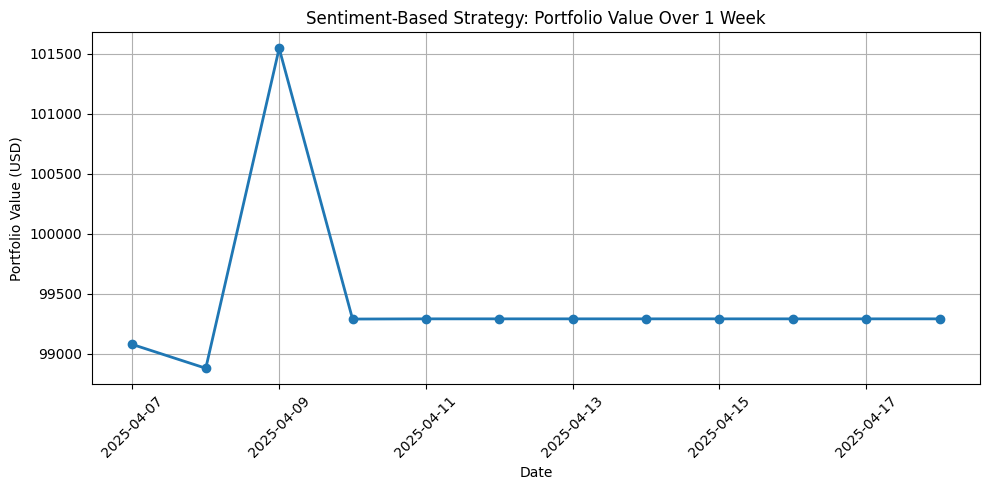

In [5]:
# Create DataFrame from strategy returns
df = pd.DataFrame(df)

# Ensure correct data types
df['date'] = pd.to_datetime(df['date'])
df = df.sort_values('date')
df['portfolio_value'] = pd.to_numeric(df['portfolio_value'], errors='coerce')

# Plot the portfolio value
plt.figure(figsize=(10, 5))
plt.plot(df['date'], df['portfolio_value'], marker='o', linewidth=2)
plt.title('Sentiment-Based Strategy: Portfolio Value Over 1 Week')
plt.xlabel('Date')
plt.ylabel('Portfolio Value (USD)')
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()